# <center> HW1 - Real Estate Linear Regression </center>

# Question 1: NumPy Linear Regression
In this question, students will implement the linear regression model via stochastic gradient descent (SGD) to predict the real estate cost using the provided data. Students must use only NumPy, Stat, Pandas, and Matplotlib in this question.

a) Perform pre-processing and EDA on the data and split it into training and testing datasets. Have a split ratio of 75% and 25% for the training and testing datasets, respectively. Please explain the performance. Students can make visualizations if necessary.

# A. Load Data

In [2]:
import pandas as pd
import numpy as np

DF = pd.read_csv('Real_Estate.csv')
DF.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


Let's take a look at a few observations in our data, and try to understand more about how features may be related to our target. While we can enter the pre-processing and exploratory data analysis phase with assumptions on how our features of X1-X6 (wherein X5,X6 ~ location) on our target Y ~ house price per unit area, it will be best to statistically compute relations between our data, such that we can balance computational costs with model accuracy for a highly effective linear regression predictive model.

# B. Exploratory Data Analysis (EDA)

Let's understand the structure of the 'Real Estate.csv' dataset (NOTE: I renamed it to Real_Estate.csv)

In [3]:
DF.shape

(414, 8)

This output suggests that there are 414 observations provided in the dataset. Of the 414 examples, we will use 75% for training the dataset and 25% to test the validity of our model.

In [4]:
DF.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Given the types of our data, we are able to see that we have 6 features, X1-X6 which we will use to capture patterns amongst desired features (and combinations of them) which will allow us to minimize errors in our model and its predictions.

In [5]:
DF.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


By taking a short look at the distribution provided by the fields in our data set, we can learn more about how relations may be present and how data and its meaning is represented. For example, we can see that the average (mean) house price per unit area is 37.98 Taiwanese dollars. Also, the median house price per unit area (50% position/2nd Quarter) is 38.45 Taiwanese dollars. 

From this, we can see that mean < median (house price per unit area), but not considerably, which is a good sign. The fact they are quite close to each other assures us that we have a large, diverse enough dataset to capture relevant patterns between our features (X1-X6) and our target (Y ~ house price per unit area) in terms of preparing our data for model implementation.

Another piece of good news is that the fact that our mean < median helps us assure validity of our data this point. The provided statistical description that our data ~ house price per unit area has a <bold> slight <bold> left (negative) skew checks out well with the general capialist renters market, in which there is a higher volume of more affordable (normal and inferior [in terms of macroeconomics]) housing than there is of its more luxurious counterpart, as the capitalist system relies on exploitation of the mass of people.

In [10]:
DF.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Above, we check the missing values in the dataset. Fortunately, we don't have any observations with missing column-data. 

## B.1 Visualization

In [6]:
import matplotlib.pyplot as plt

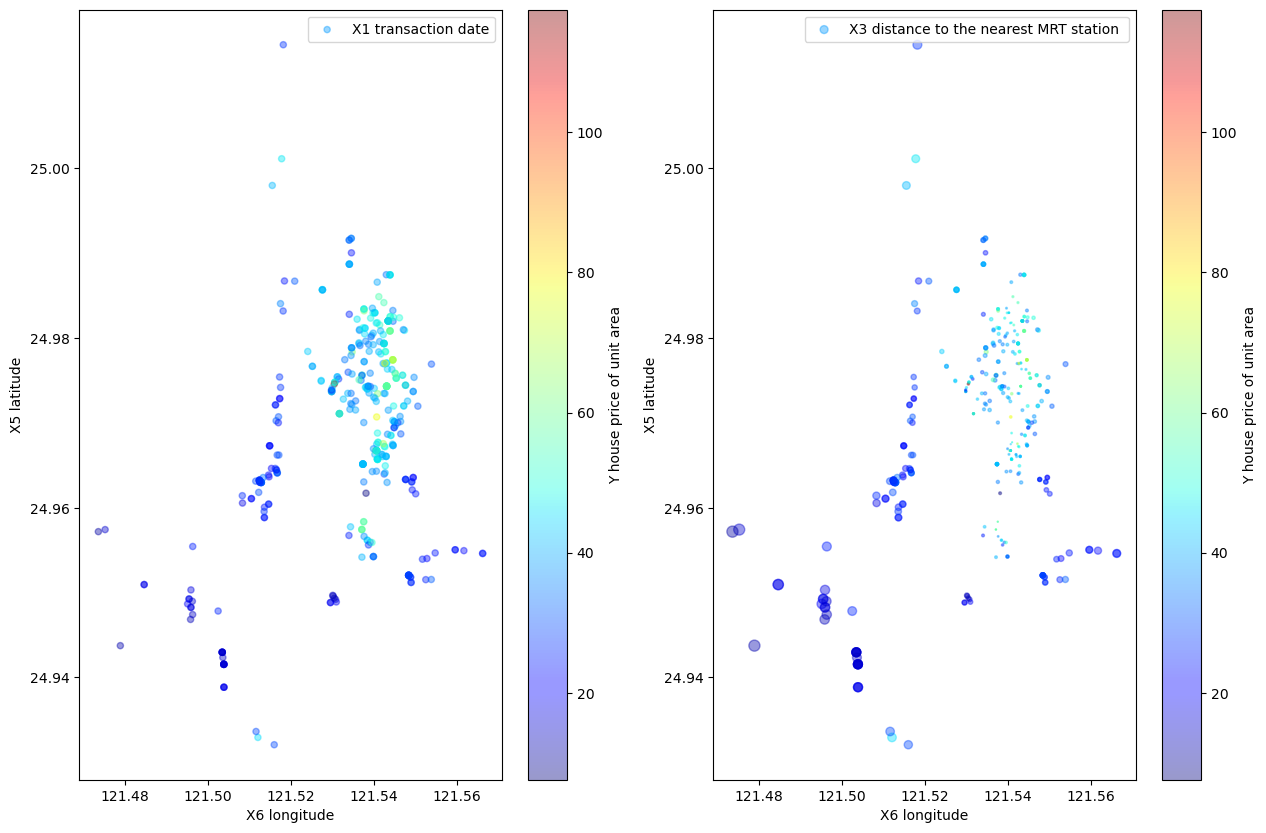

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X1 transaction date"]/100,
       label="X1 transaction date",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax1)

DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X3 distance to the nearest MRT station"]/100,
       label="X3 distance to the nearest MRT station ",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax2)
plt.legend()
plt.show()

Notably, we can use graphical representations to show how the housing market (house price of unit area) and the features (X1-X4) may be related. Above, we can see the graphical mappings (latitude, longitude) against two features X1 (transaction date) and X3 (distance to the nearest MRT station) have notable impact on the target Y (house price per unit area), even as we take just 1% of the value of the data. This may suggest that these attriutes are naturally and strongly correlated with the house price per unit area. 

Below, we have comparatively "amplified" the data on X2 (house age) and X4 (number of convenience stores) by different degrees of 10, in order to try to capture the bigger and better picture of the data. The fact that the maps without this amplification doesn't gain much use for us is not a problem at all actually, as there can very well still be underlying patterns and correlations that just necessitate success in the pre-processing phase, and further data training process.

Particularly, it is useful to note in the graph demonstrating the number of convenience stores (below on the right) that as we get further away from more populous zones (identifiable from densely packed, and maybe more expensive, housing units). The insight gained from this map suggests that convenience stores are less common in less populated zones, and more prevalent in highly populous areas, which makes logical sense.

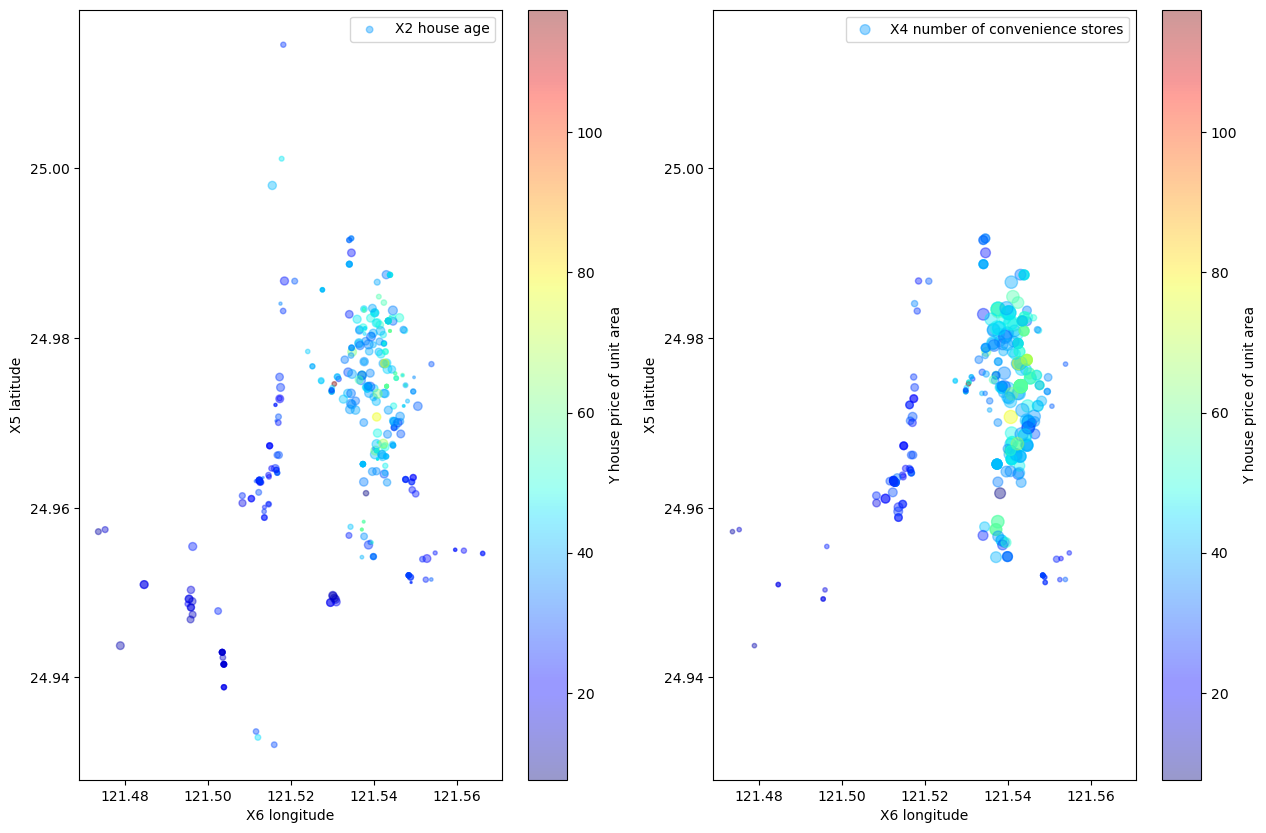

In [8]:
fig, (ax3, ax4) = plt.subplots(1, 2,figsize=(15,10))
DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X2 house age"],
       label="X2 house age",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax3)

DF.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=DF["X4 number of convenience stores"]*10,
       label="X4 number of convenience stores",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True, ax=ax4)
plt.legend()
plt.show()

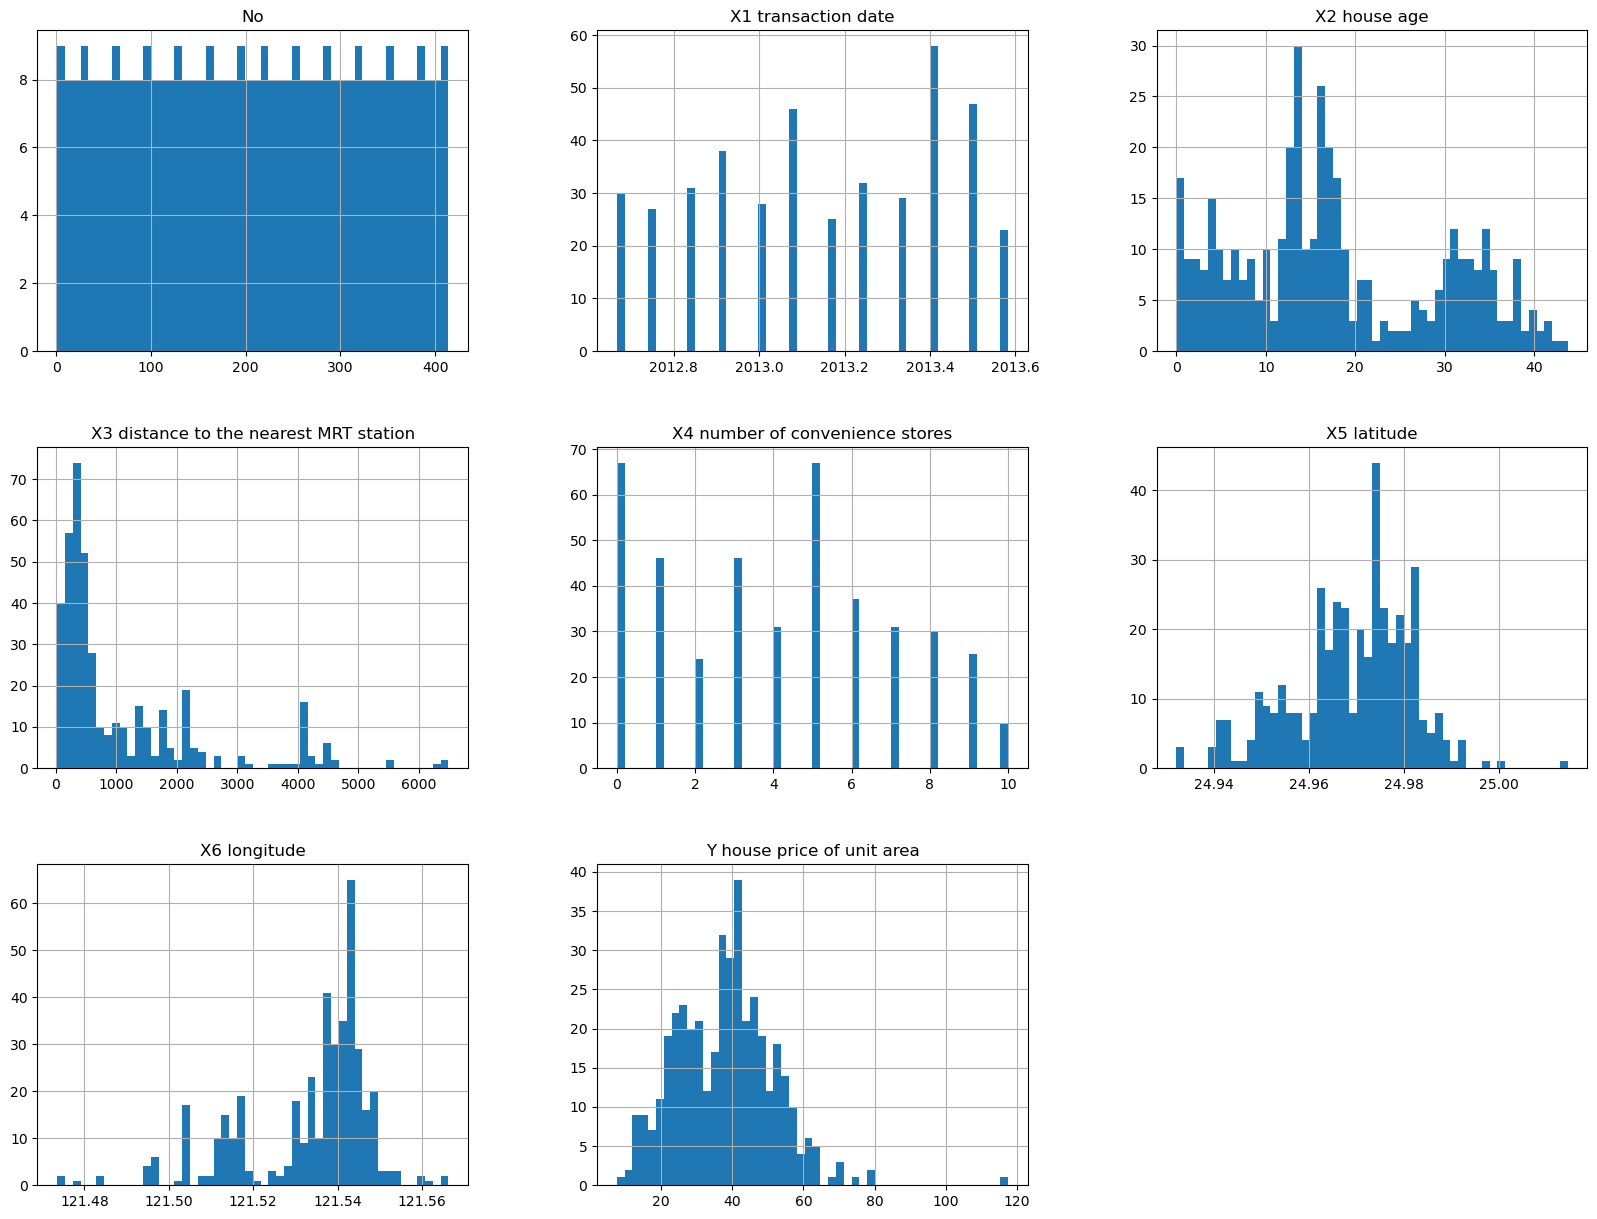

In [9]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

In this histogram, we can get a sense for each columns separate distributions. From this, we can note details such as whether each feature generally faces a upside-down U shaped distribution and skewness to the left or right to suggest data is normally distributed, as is required by the algorithm, and to keep note of which columns may contain outliers. All of these properties must be checked, such that we have a normal distribution without outliers, which we can achieve through different skewed data transformations and outlier-reimputations (without changing the model performance). 

In [ ]:
from scipy.stats import lognorm
import statsmodels.api as sm

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
DF['median_income'].plot.box(ax=ax1)
DF_ = DF[DF['median_income']<=8]
DF_['median_income'].plot.box(ax=ax2)
plt.show()

A box plot can show the data distribution and outliers in each feature with more statistical precision than our histograms. 